In [108]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/dataset/BostonHousing.csv")

In [110]:
df.shape

(506, 14)

In [111]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [112]:
df.drop_duplicates(inplace =True)

In [113]:
df.shape

(506, 14)

In [114]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [115]:
df.fillna(value = 0, inplace =True)

In [116]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [117]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.222243,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.938125,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,0.000000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.877250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.194000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

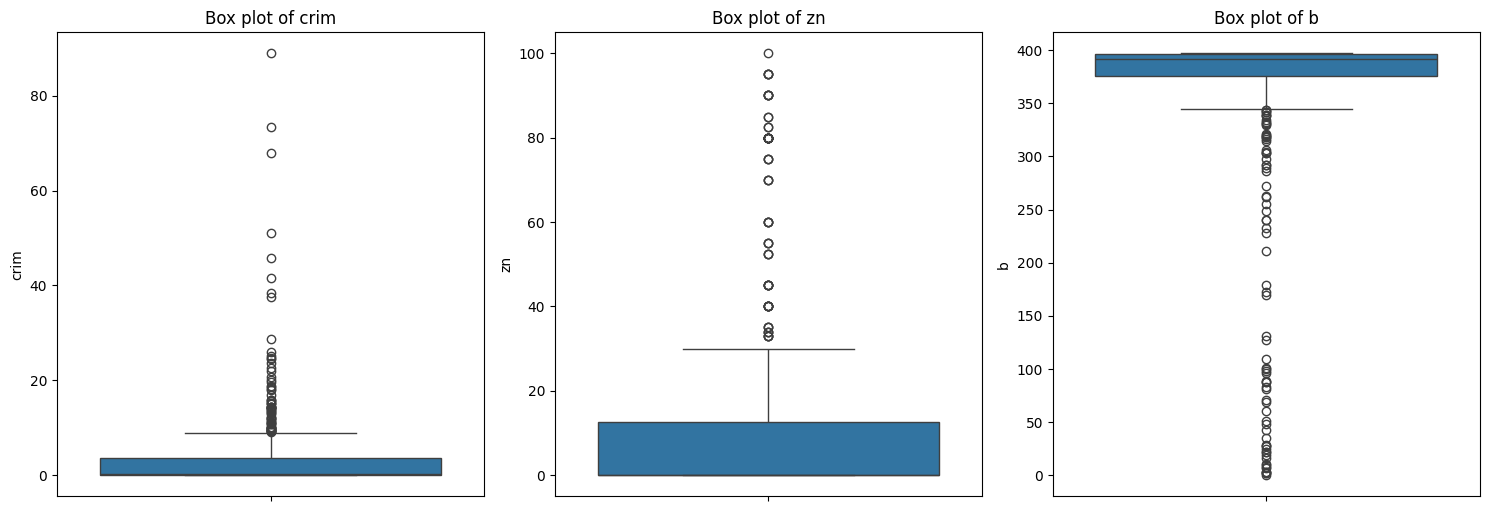

In [119]:

columns = ['crim', 'zn', 'b']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


In [120]:
import numpy as np

In [121]:
q1_crim = np.percentile(df['crim'], 25, interpolation='midpoint')
q3_crim = np.percentile(df['crim'], 75, interpolation='midpoint')
iqr_crim = q3_crim - q1_crim

q1_zn = np.percentile(df['zn'], 25, interpolation='midpoint')
q3_zn = np.percentile(df['zn'], 75, interpolation='midpoint')
iqr_zn = q3_zn - q1_zn

q1_b = np.percentile(df['b'], 25, interpolation='midpoint')
q3_b = np.percentile(df['b'], 75, interpolation='midpoint')
iqr_b = q3_b - q1_b

In [122]:
lower_bound_crim = q1_crim - 1.5 * iqr_crim
upper_bound_crim = q3_crim + 1.5 * iqr_crim

lower_bound_zn = q1_zn - 1.5 * iqr_zn
upper_bound_zn = q3_zn + 1.5 * iqr_zn

lower_bound_b = q1_b - 1.5 * iqr_b
upper_bound_b = q3_b + 1.5 * iqr_b

In [123]:
df = df[
    (df['crim'] >= lower_bound_crim) & (df['crim'] <= upper_bound_crim) &
    (df['zn'] >= lower_bound_zn) & (df['zn'] <= upper_bound_zn) &
    (df['b'] >= lower_bound_b) & (df['b'] <= upper_bound_b)
]

In [124]:
df.shape

(327, 14)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     327 non-null    float64
 1   zn       327 non-null    float64
 2   indus    327 non-null    float64
 3   chas     327 non-null    int64  
 4   nox      327 non-null    float64
 5   rm       327 non-null    float64
 6   age      327 non-null    float64
 7   dis      327 non-null    float64
 8   rad      327 non-null    int64  
 9   tax      327 non-null    int64  
 10  ptratio  327 non-null    float64
 11  b        327 non-null    float64
 12  lstat    327 non-null    float64
 13  medv     327 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.3 KB


In [126]:
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [127]:

features = ['rm', 'lstat']  
target = 'medv' 

X = df[features]
y = df[target]


In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

MinMaxScaler()

In [129]:
X[:]=scaler.transform(X)

In [130]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((261, 2), (66, 2), (261,), (66,))

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [133]:
y_pred = model.predict(X_test)

In [134]:
y_test

297    20.3
125    21.4
326    23.0
9      18.9
107    20.4
       ... 
324    25.0
73     23.4
140    14.0
339    19.0
220    26.7
Name: medv, Length: 66, dtype: float64

In [135]:
y_pred[:5]

array([19.63876   , 20.92995363, 28.22805635, 19.28055493, 21.84327546])

In [138]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Mean Squared Error: 21.40142763435401
R² Score: 0.5335841835573703
